# Practical example
## Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Raw data

In [2]:
raw_data = pd.read_csv('./practical-example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocessing
### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


- A lot of information from 'Model' could be engineered from 'Brand', 'Year' and 'EngineV' so we won't be loosing too much variability
### Determining the variables of interest

In [4]:
data = raw_data.drop(['Model'], axis=1) # axis 0 (rows), axis 1 (colums)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

- Rule of thumb: if you are removing <5% of the observations, you are free to just remove all that have missing values

In [7]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


- Pay attention from mean to max on descriptive table, may help to sense the distribution shape
### Exploring the PDFs (Probability Distribution Functions)

<AxesSubplot:xlabel='Price', ylabel='Density'>

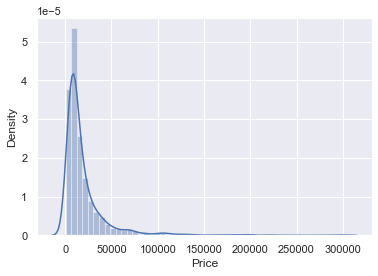

In [8]:
sns.distplot(data_no_mv['Price'])

- One way to deal with outliers seemlessly is to remove top 1% of observations
### Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


- While still far from the mean, it is acceptably closer

<AxesSubplot:xlabel='Price', ylabel='Density'>

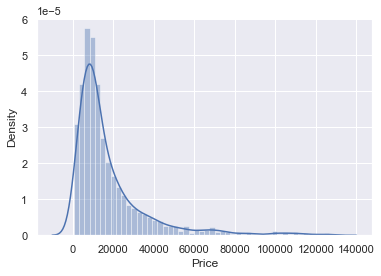

In [10]:
sns.distplot(data_1['Price'])

### Exploring the PDFs & Dealing with outliers

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

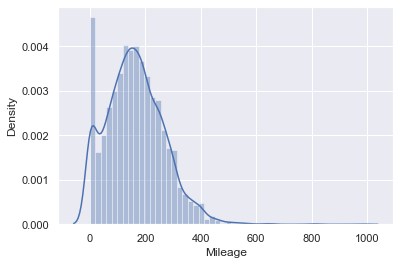

In [11]:
sns.distplot(data_no_mv['Mileage'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

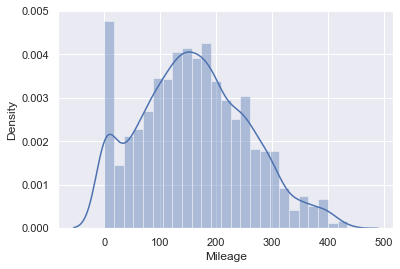

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

sns.distplot(data_2['Mileage'])

### Exploring the PDFs & Dealing with outliers

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

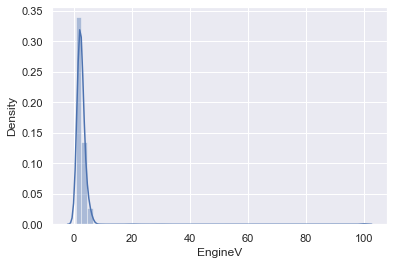

In [13]:
sns.distplot(data_no_mv['EngineV'])

In [14]:
eng_v = pd.DataFrame(raw_data['EngineV'])
eng_v = eng_v.dropna(axis=0)
eng_v.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


- Based on Wikipedia 99.99 are not usual values, normally falls into 0.6 to 6.5
- Looking at the descriptors it seems that most values are really low
- A common way to label missing values is by assigning 99.99, it is a bad idea to label values in such ways as it is hard for others users of the data ti distinguish them from true values

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

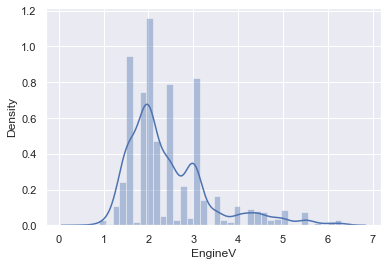

In [15]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

### Exploring the PDFs & Dealing with outliers

<AxesSubplot:xlabel='Year', ylabel='Density'>

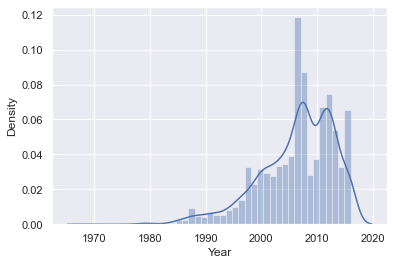

In [16]:
sns.distplot(data_no_mv['Year'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

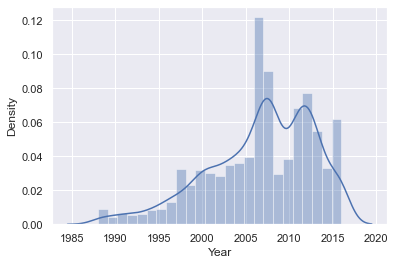

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

### Cleaned data

In [18]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS(Ordinary Least Squares) assumptions
- Categorical variables will be included like dummies, we don't need to worrie for them
- Be aware for continuos variables 'Price', 'Year', 'EngineV' and 'Mileage'

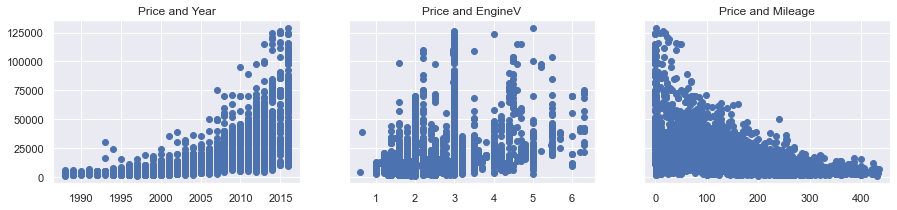

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

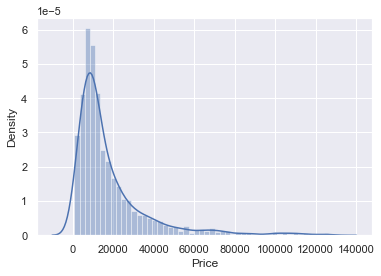

In [20]:
sns.distplot(data_cleaned['Price'])

- Their does not have linear relationship
- Log tranformation are especially useful when facing exponential relationships
## Relaxing the assumptions
### Linearity

In [21]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


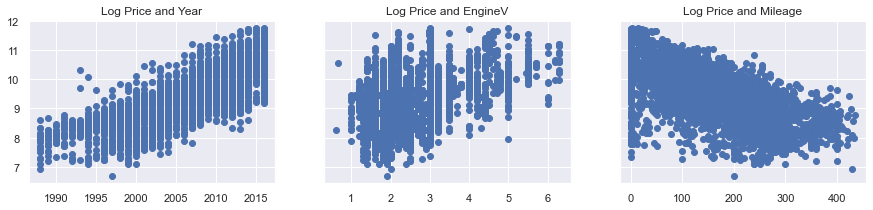

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [23]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### No endogeneity
- Normaly is asume for big samples
- Log transformation is a common fix for homoscedasticity
### No autocorrelation
- The observations that we have are not comming from time series data o panel data
### Multicollinearity
- 'Year' and 'Mileage' are correlated
- One of the best ways to check for multicollinearity is through VIF(variance inflation factor)

In [24]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

,VIF,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


- VIF = 1: no multicollinearity
- 1 < VIF < 5: perfectly okay
- 5 < VIF: unacceptable # 6 < VIF, 10 < VIF, no concense for the topic
- You'll find data so perfect that all features have VIF < 5
- When can we safely ignore multicollinearity? https://statisticalhorizons.com/multicollinearity

In [26]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy variables
- If we have N categories for feature, we have to create N-1 dummies

In [27]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) # Drop first to avoid multicollinearity
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [28]:
vif_with_dummies = pd.DataFrame()

vif_with_dummies['VIF'] = [variance_inflation_factor(data_with_dummies.values, i) for i in range(data_with_dummies.shape[1])]
vif_with_dummies['features'] = data_with_dummies.columns

vif_with_dummies

,VIF,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


### Multicollinearity without drop first

In [29]:
data_with_dummies_ = pd.get_dummies(data_no_multicollinearity)
data_with_dummies_.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [30]:
vif_with_dummies_ = pd.DataFrame()

vif_with_dummies_['VIF'] = [variance_inflation_factor(data_with_dummies_.values, i) for i in range(data_with_dummies_.shape[1])]
vif_with_dummies_['features'] = data_with_dummies_.columns

vif_with_dummies_

,VIF,features
0,2.365473,Mileage
1,1.812970,EngineV
2,4.018878,log_price
3,inf,Brand_Audi
4,inf,Brand_BMW
5,inf,Brand_Mercedes-Benz
6,inf,Brand_Mitsubishi
7,inf,Brand_Renault
8,inf,Brand_Toyota
9,inf,Brand_Volkswagen


## Rearrange

In [31]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [32]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression
### Declare Inputs and the Targets

In [33]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale data
- It is not usually recommended to standardize dummy variables
- Scaling has no effect on the predictive power of dummies, once scaled, though, they lose all their dummy meaning

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [36]:
inputs_scaled = scaler.transform(inputs)

### Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Create the regression

In [38]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

- A simple way to check the final result is to plot the predicted values against the observed values

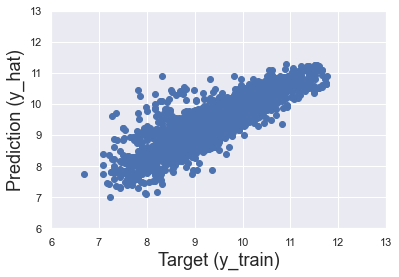

In [46]:
y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Prediction (y_hat)', size=18)

plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

- If we want the 'Target' be 'a' the one to prediction will have to be 'a'
- The closer our scatter plot to the transversal line, the better the model
### Residual plot
- Residual = Differences between the target and the prediction

Text(0.5, 1.0, 'Residual PDF')

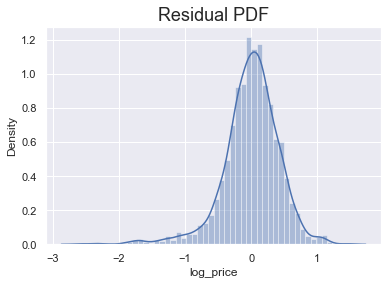

In [40]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

- The residuals are the estimates of the erros
- Residual PDF is Normaly distribute
- Left tail is bigger. There are certain observations for which (y_train - y_hat) is much lower than the mean (a much higher price is predicted than is observed)

### $R^2$

In [41]:
reg.score(x_train, y_train)

0.7546487921881218

- Our model is explaining the 75.46% of the variability of the data
### Bias

In [42]:
reg.intercept_

9.421003614148074

### Weights

In [43]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [44]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


### Weights interpretation
- A 'positive weight' shows that as a feature increases in value, so do the 'log_price' and 'Price' respectively
- A 'negative weight' shows that as a feature increases in value, 'log_price' and 'Price' decrease
- For dummies is different becoause we use 0 and 1

In [45]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

- Audi was drop, when the others dummies are 0 Audi is 1... Audi is the benchmark
- A 'positive weight' on dummies shows that the respective category (Brand) is more expensive than the benchmark (Audi)
- A 'negative weight' on dummies shows that the respective category (Brand) is less expensive than the benchmark (Audi)
---
- The bigger the weight, the bigger the impact
- Dummies are only compared to their respective benchmark

## Testing

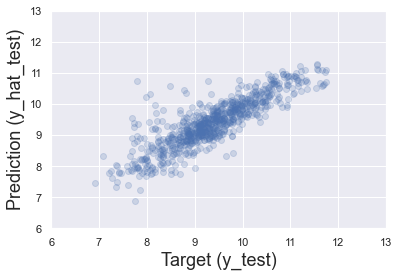

In [48]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Prediction (y_hat_test)', size=18)

plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

- Where more close the concentration of data around the transversal line, much better predictive power for lower o higger 'Price'
- The more saturated the color, the higher the concentration

In [49]:
# These are the predictions for the log prices!
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,10.607063
1,8.981794
2,8.658221
3,9.186643
4,8.857567


In [50]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [52]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


### Residual

In [53]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf

,Prediction,Target,Residual,Difference%
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [54]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


- The minimun Difference% is 0.06, in that case the output was spot on!
- For 25%, 50% & 75%, for most of our predictions we got relatively close

In [59]:
# pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
425,2995.68,3000.00,4.32,0.14
...,...,...,...,...
713,13941.93,2200.00,-11741.93,533.72
280,39469.51,4800.00,-34669.51,722.28
219,27632.40,2900.00,-24732.40,852.84
750,30076.59,3150.00,-26926.59,854.81


- The observed prices (targets) are extremely low
- On average our model is pretty decent at predicting the price
- For the last samples the 'Residual' are negative, there for their prediction are higher than the targets (left long tail), may be we are missing an important factor because the target value is so low. It may be the model of the car, which we removed, or it be that the car was damaged in some way
### How to improve our model
- Use different set of variables
- Remove a bigger part of the outliers
- Use different kinds of transformations